# In class exercise...Mutual Information

## Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mutual_info_score

## Load in the eeg data from previous tutorials...
* `data` is a trials x time matrix of EEG responses
* `sr` is the sample rate
* `tx` is the time associated with each sample on each trial

In [10]:
# load the data...
eeg = np.load('eeg_data01.npz')

# get the different arrays like this...kind of like a structure in matlab. 
eeg['data']
eeg['sr']
eeg['tx']

# and can query the attributes of the data like this...which will tell us that there 1600 trials and 4102 timepoints per trial sampled
# at 1024Hz
print('Shape of the big eeg data set: ', eeg['data'].shape)
print('Sample rate: ', eeg['sr'])

# and if you want to save some typing, especially because we only have a few variables, you reassign the different arrays like this
data = eeg['data']
data[400:800,:] += 5
sr = eeg['sr']
tx = eeg['tx']

Shape of the big eeg data set:  (1600, 4102)
Sample rate:  1024


## Make a vector that labels each trial as coming from experimental conditions 1,2,3,4
* Figure out how many trials there are in the data set (let's call that `N`). 
* Divide that by 4
* then make a vector that has N/4 1s, followed by N/4 2s, followed by N/4 3s, followed by N/4 4s (I would suggest using `np.hstack` and `np.ones` to achieve this but there are many ways...)


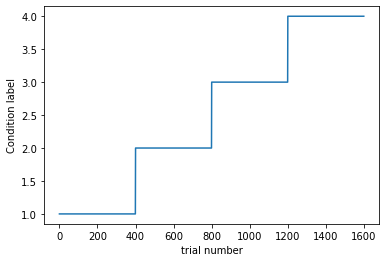

In [22]:
N = data.shape[0]
num_samp_cond = int(N/4)
cond = np.hstack((np.ones(num_samp_cond), 
                  np.ones(num_samp_cond)*2, np.ones(num_samp_cond)*3, np.ones(num_samp_cond)*4))

plt.plot(cond)
plt.xlabel('trial number')
plt.ylabel('Condition label')
plt.show()


## Now avgerage the data from condition 2, avg the data from condition 3, and plot against the time axis (tx) - we're going to ignore conditions 1 and 4

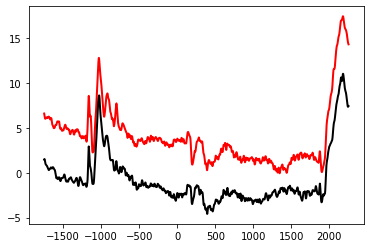

In [11]:
avg1 = np.mean(data[cond==2,:], axis=0)
avg2 = np.mean(data[cond==3,:], axis=0)

plt.plot(tx, avg1, color='r', linewidth=2)
plt.plot(tx, avg2, color='k', linewidth=2)
plt.show()

## Then compute the MI between evoked EEG responses, averaged over time, and experimental condition 
* You have one discrete variable (`cond`, or experimental condition label)
* You have the EEG data from each condition, which is a continuous variable
* First compute the mean response over time for each trial of condition 2. This should give you a 400 element array with the mean from each trial. 
* Then compute the mean response across time for each trial of condition 3. 
* Then concatenate (of hstack) the two 400 element arrays to make one 800 element array
* You might also want to create a new set of labels for each trial in your new concatenated array - can relabel conds 2 and 3 with a 0 and 1...so it would have 400 0's followed by 400 1's (don't have to do this, but you will have to come up with some labels that separate the first 400 trials from the last 400 trials). 
* Use 20 bins for discretizing the continuous EEG data...
* Then compute the MI between experimental condition and EEG responses

#### first compute means over time window for conds 2 and 3, stack up...

In [16]:
# just data from cond 2, meaned over time
td2 = np.mean(data[cond==2,:], axis=1)

# then cond 3 data
td3 = np.mean(data[cond==3,:], axis=1)

# concatenate
resp = np.hstack((td2, td3))

# check the size to be sure we did this right...
resp.shape

(800,)

#### then make new labels...400 zeros stacked on top of 400 ones

In [19]:
# make a new set of labels

# first 1/2 of the data came from condition 1, second half from condition 2

# ntrials in each condition
ntrials = int(resp.shape[0]/2)

stims = np.hstack((np.zeros(ntrials),np.ones(ntrials)))

# check the shape
stims.shape

(800,)

#### now compute MI!

In [20]:
# how many bins? 
nbins = 20

# first bin the data using histogram. 
# however, just save the edges of each bin
_, edges = np.histogram(resp, bins=nbins)

# then sort all of the continuous responses in bins
# use numpy digitize...you pass in the continuous 
# response and the bin edges and it will sort each 
# response into the appropriate bin
bin_y = np.digitize(resp, edges)

# then compute MI! note that stims is a N x 1 array (2D)
# and mutual_info_score requires a 1D array so I am 
# "squeezing" out the the singular dim to make it a N, array (1D) 
MI = mutual_info_score(np.squeeze(stims),bin_y) * np.log2(np.e)

print(MI)

0.6466833039466658


## Does that number seem kinda low given the visual separation of the mean responses you plotted above? Plot some histograms of the data from condition 2 vs condition 3...how much overlap is there? Does the MI value you computed now seem more reasonable? 

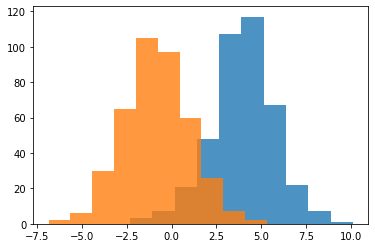

In [21]:
plt.hist(resp[stims==0], alpha = .8)
plt.hist(resp[stims==1], alpha = .8)
plt.show()

## Challenge question: How "good" is that MI value? What is the max value it could take in this scenario? How might you compute a `normalized` MI metric that tells you how much information there is relative to that max value? 

## 